In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%config Completer.use_jedi = False

# Load required packages

In [3]:
import anndata as ad
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scvelo as scv
import scanpy as sc
import seaborn as sns
import torch
import gc
import importlib

In [4]:
import scvi
scvi.settings.seed = 0

Global seed set to 0


# Load neural networks classes for noSpliceVelo

In [5]:
# Add path to src
import sys
dir_path = os.path.abspath(os.path.join(os.getcwd(), "..", "src"))
sys.path.append(dir_path)

In [6]:
# firt VAE model
import scvi_modified_capture_efficiency_model 

# second VAE model; noSpliceVelo model
import nosplicevelo_model

In [7]:
importlib.reload(scvi_modified_capture_efficiency_model)
importlib.reload(nosplicevelo_model)

<module 'nosplicevelo_model' from '/media/atheistpoet/TarunHDD/maslov_lab/code/noSpliceVelo/src/nosplicevelo_model.py'>

In [8]:
from scvi_modified_capture_efficiency_model import SCVIModified
from nosplicevelo_model import noSpliceVelo

# load mouse erythroid dataset

In [12]:
# load data already processed and with velocities
# anndata object available at Mahajan, Tarun (2024). adata_mouse_erythroid. 
# figshare. Dataset. https://doi.org/10.6084/m9.figshare.27022324.v2
dir_path = os.path.abspath(os.path.join(os.getcwd(), '..', \
                                        "data",\
                                        "mouse_erythroid"))
os.makedirs(dir_path, exist_ok=True)
filname = os.path.join(dir_path, \
                       f'adata_mouse_erythroid_nosplicvelo' + \
                       f'.h5ad')
adata_ery = ad.read_h5ad(filname)

# mu and var from the first VAE model
mu_scvi_smooth = adata_ery.layers['mu'].copy()
var_scvi_smooth = adata_ery.layers['std'].copy()**2.0

In [13]:
# match the order of cells in adata and adata_pan
adata_ery.shape

(9815, 1907)

# Figures for noSpliceVelo

## Figures 4a

In [14]:
import new_velocity_graph
new_velocity_graph.velocity_graph(adata_ery, xkey="mu_geneCell", vkey="velocity_geneCell")

computing velocity graph (using 1/16 cores)
    finished (0:00:23) --> added 
    'velocity_geneCell_graph', sparse matrix with cosine correlations (adata.uns)


### Figure 4a. velocity stream for mean of expression

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_geneCell_umap', embedded velocity vectors (adata.obsm)


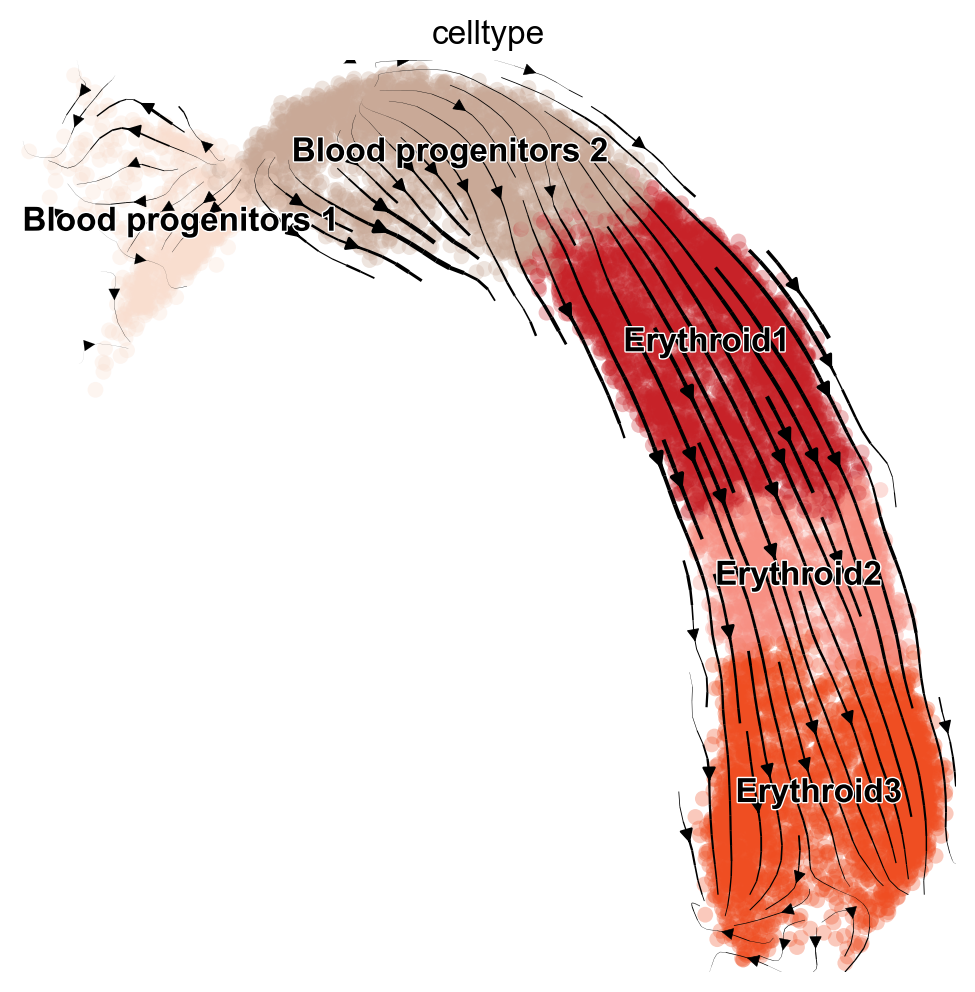

In [15]:
scv.set_figure_params('scvelo')
import new_velocity_embedding_stream
new_velocity_embedding_stream.velocity_embedding_stream(adata_ery, \
                                                        basis='umap', \
                                                        show=True, \
                                                        figsize=(6, 6), \
                                                        vkey='velocity_geneCell', color='celltype')

## Figures 4c and 1d

### Figure 4c: variance vs mean for Gstm5

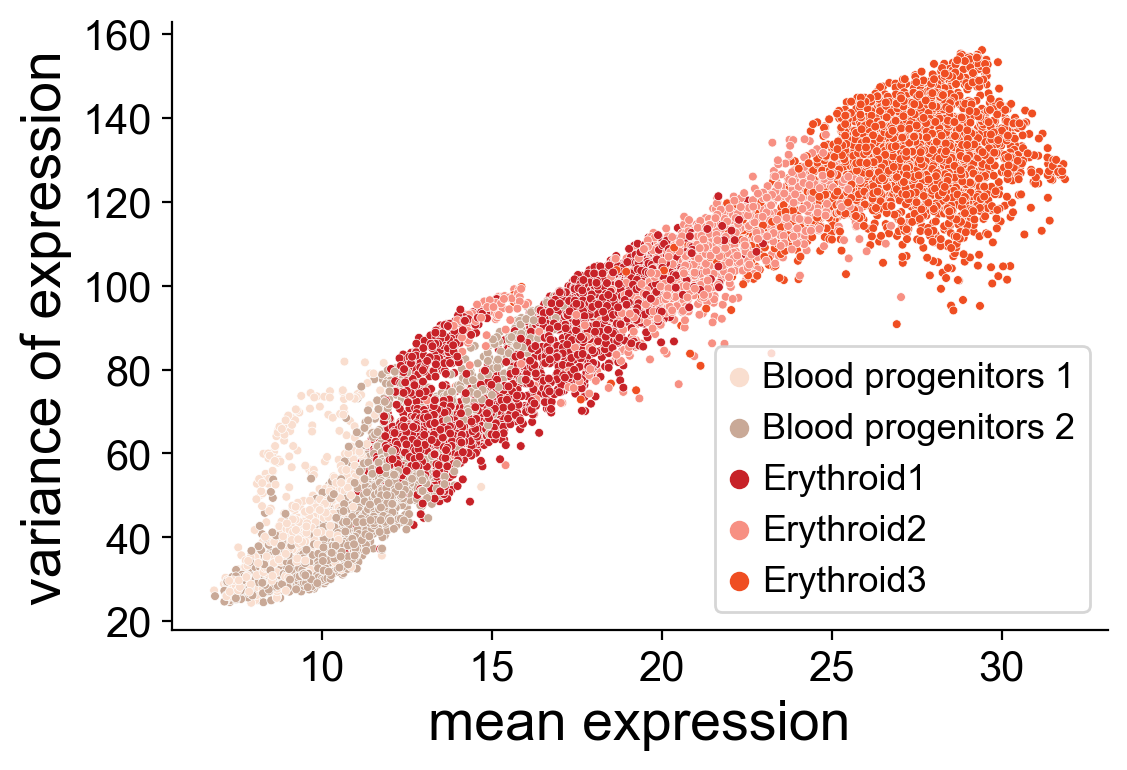

In [16]:
gene_name = "Gstm5"
gene_ = np.where(adata_ery.var_names == gene_name)[0][0]
x = mu_scvi_smooth[:, gene_].copy()
y = var_scvi_smooth[:, gene_].copy()
# x = mu_scvi_pos[:, gene_].copy()
# y = var_scvi_pos[:, gene_].copy()
z = adata_ery.obs['celltype'].values.copy()
hue_order = ['Blood progenitors 1', "Blood progenitors 2", "Erythroid1", \
             "Erythroid2", "Erythroid3"]
colrs_ = adata_ery.uns['celltype_colors'].copy()
col_palette = {}
for count_, clust_ in enumerate(hue_order):
    col_palette[clust_] = colrs_[count_]
plt_ = sns.scatterplot(x=x, y=y, s=10, hue=z, hue_order=hue_order, palette=col_palette)

plt_.set_xlabel("mean expression", fontsize=20)
plt_.set_ylabel("variance of expression", fontsize=20)
plt_.set_xticklabels(plt_.get_xticklabels(), fontsize=15)
plt_.set_yticklabels(plt_.get_yticklabels(), fontsize=15)
plt_.legend(fontsize=13)
sns.despine()

### Figure 4d: variance vs mean for Chchd10

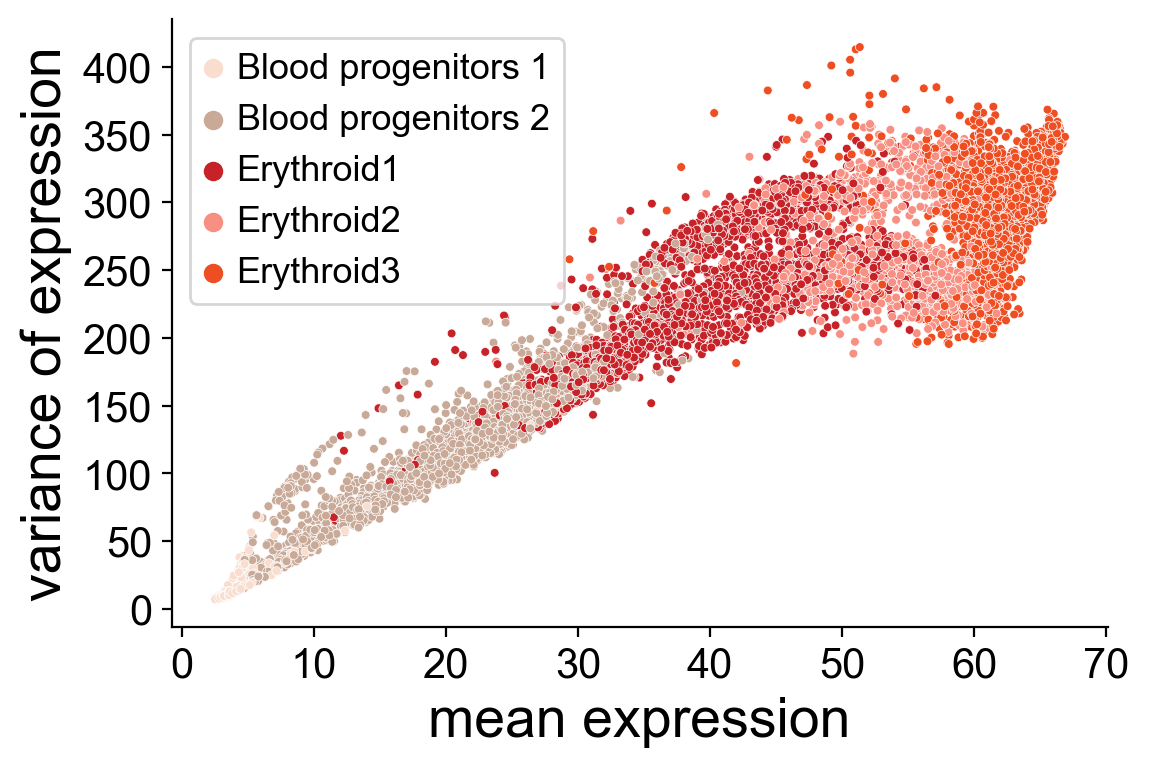

In [17]:
gene_name = "Chchd10"
gene_ = np.where(adata_ery.var_names == gene_name)[0][0]
x = mu_scvi_smooth[:, gene_].copy()
y = var_scvi_smooth[:, gene_].copy()
# x = mu_scvi_pos[:, gene_].copy()
# y = var_scvi_pos[:, gene_].copy()
z = adata_ery.obs['celltype'].values.copy()
hue_order = ['Blood progenitors 1', "Blood progenitors 2", "Erythroid1", \
             "Erythroid2", "Erythroid3"]
colrs_ = adata_ery.uns['celltype_colors'].copy()
col_palette = {}
for count_, clust_ in enumerate(hue_order):
    col_palette[clust_] = colrs_[count_]
plt_ = sns.scatterplot(x=x, y=y, s=10, hue=z, hue_order=hue_order, palette=col_palette)

plt_.set_xlabel("mean expression", fontsize=20)
plt_.set_ylabel("variance of expression", fontsize=20)
plt_.set_xticklabels(plt_.get_xticklabels(), fontsize=15)
plt_.set_yticklabels(plt_.get_yticklabels(), fontsize=15)
plt_.legend(fontsize=13)
sns.despine()

# Figures for scVelo

In [29]:
# load data already processed and with velocities
# anndata object available at Mahajan, Tarun (2024). adata_mouse_erythroid. 
# figshare. Dataset. https://doi.org/10.6084/m9.figshare.27022324.v2
dir_path = os.path.abspath(os.path.join(os.getcwd(), '..', "data", \
                                        "mouse_erythroid"))
filname = os.path.join(dir_path, \
                       f'adata_mouse_erythroid_scvelo.h5ad')
adata_ery_scvelo = ad.read_h5ad(filname)

In [35]:
import new_velocity_graph
new_velocity_graph.velocity_graph(adata_ery_scvelo)

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/16 cores)
    finished (0:00:11) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [36]:
adata_ery_scvelo

AnnData object with n_obs × n_vars = 9815 × 2000
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'n_genes', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'celltype_colors', 'neighbors', 'recover_dynamics', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca', 'X_umap'
    varm: 'loss'
    layers: 'Ms', 'Mu', 'fit_t', 'fit_tau', 'fit_tau_', 'spliced', 'unspliced', 'velocity', 'variance_velocity'
    obsp: 

## Figures 4b

### Figure 4b: velocity stream for spliced for scVelo

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


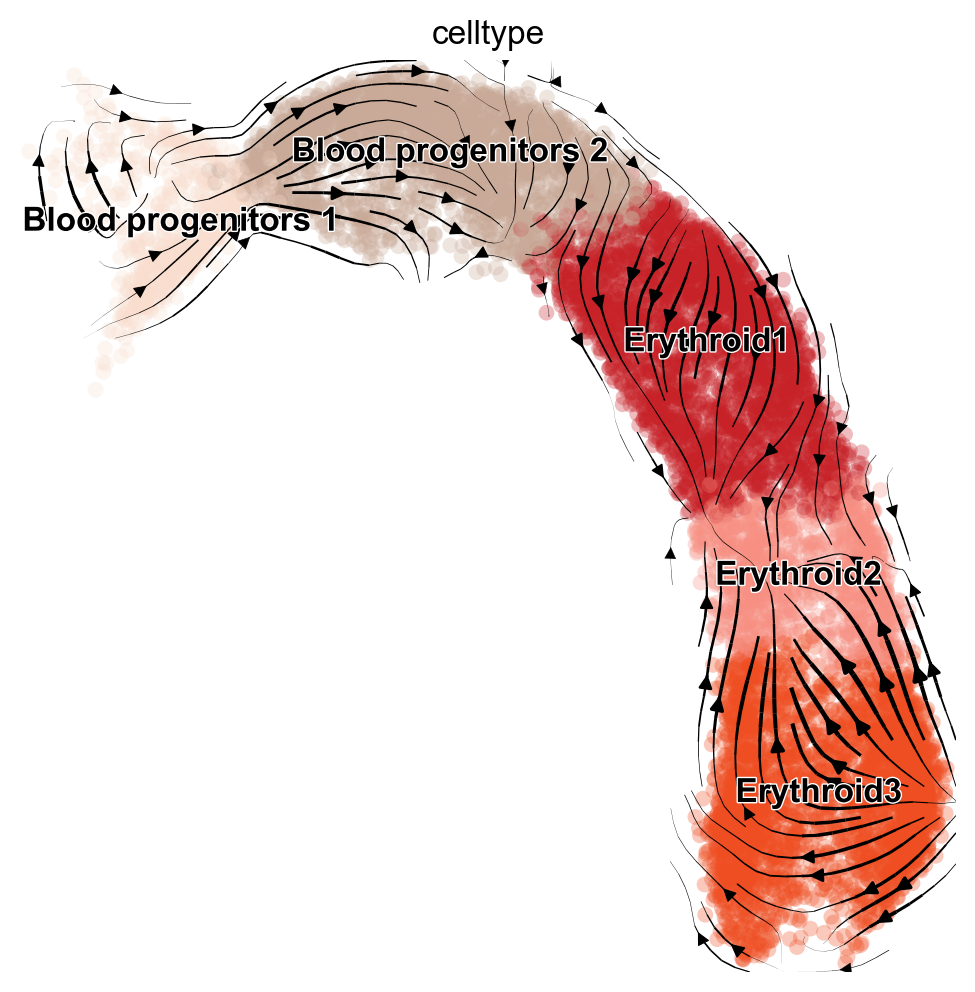

In [37]:
import new_velocity_embedding_stream
new_velocity_embedding_stream.velocity_embedding_stream(adata_ery_scvelo, \
                                                        basis='umap', \
                                                        show=True, \
                                                        figsize=(6, 6), \
                                                        vkey='velocity', color='celltype')

## Figures 4e, and 4f: Unspliced vs spliced expression of Gstm5 and Chchd10

In [32]:
import scvelo as scv
from scvelo.pl.simulation import compute_dynamics
ut = np.zeros(adata_ery_scvelo.shape)
st = np.zeros(adata_ery_scvelo.shape)
for gene_ in np.arange(adata_ery_scvelo.shape[1]):
    gene_name = adata_ery_scvelo.var_names[gene_]
    _, ut[:, gene_], st[:, gene_] = compute_dynamics(adata_ery_scvelo, basis=gene_name, key="fit")

### figure 4e: Gstm5

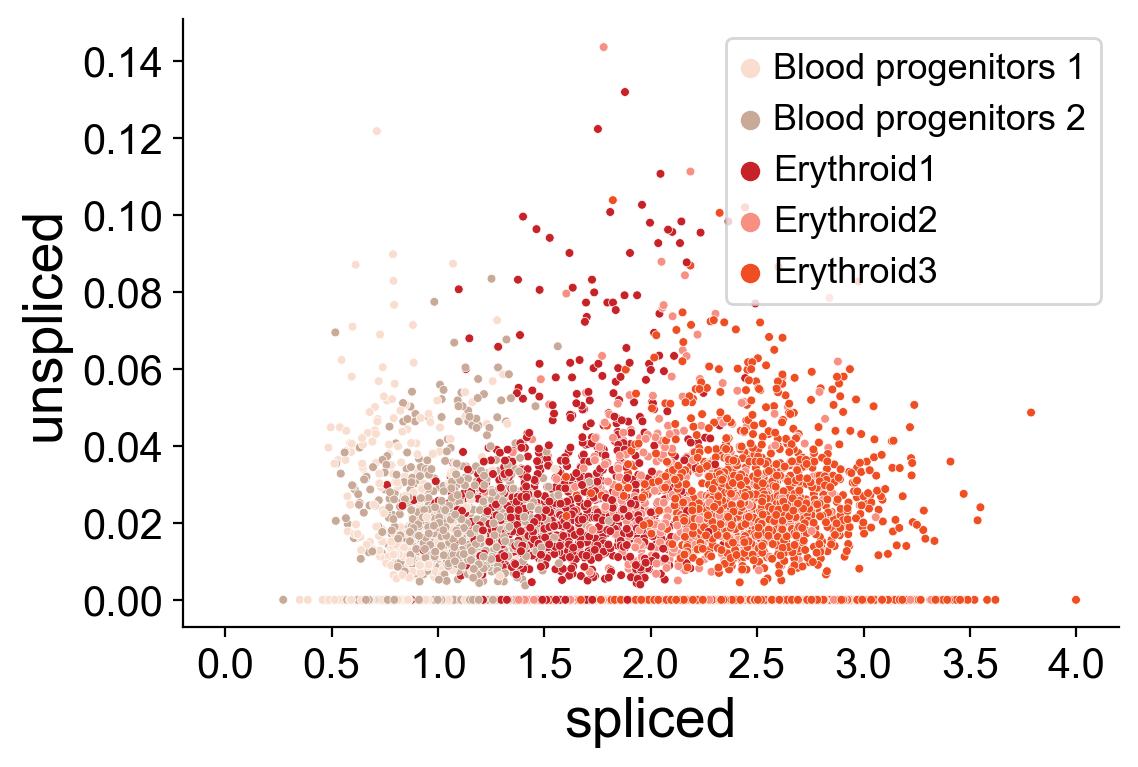

In [40]:
def get_mean_splicing(u0, s0, alpha_, beta_, gamma_, time_):
    pb = np.exp(-beta_ * time_)
    pg = np.exp(-gamma_ * time_)
    u_ss = alpha_ / beta_
    s_ss = alpha_ / gamma_
    u_t = u0 * pb + u_ss * (1 - pb)
    s_t = s0 * pg + s_ss * (1 - pg) + ((alpha_ - beta_ * u0) / (gamma_ - beta_)) * \
        (pg - pb)
    return u_t, s_t

gene_name = "Gstm5"
gene_ = np.where(adata_ery_scvelo.var_names == gene_name)[0][0]
x = adata_ery_scvelo.layers['Ms'][:, gene_].copy()
y = adata_ery_scvelo.layers['Mu'][:, gene_].copy()
z = adata_ery_scvelo.obs['celltype'].values.copy()
hue_order = ['Blood progenitors 1', "Blood progenitors 2", "Erythroid1", \
             "Erythroid2", "Erythroid3"]
colrs_ = adata_ery_scvelo.uns['celltype_colors'].copy()
col_palette = {}
for count_, clust_ in enumerate(hue_order):
    col_palette[clust_] = colrs_[count_]

alpha_ = adata_ery_scvelo.var['fit_alpha'].values[gene_].copy()
beta_ = adata_ery_scvelo.var['fit_beta'].values[gene_].copy()
gamma_ = adata_ery_scvelo.var['fit_gamma'].values[gene_].copy()
scaling_ = adata_ery_scvelo.var['fit_scaling'].values[gene_].copy()

if np.isnan(scaling_):
    scaling_ = 1.0
plt_ = sns.scatterplot(x=x, y=(y * scaling_), s=10, hue=z, hue_order=hue_order, \
                       palette=col_palette)
# up model
t_switch = adata_ery_scvelo.var['fit_t_'].values[gene_].copy()
time_ = np.linspace(0, t_switch, 10000)
u0 = 0.0
s0 = 0.0
u_up, s_up = get_mean_splicing(u0, s0, alpha_, beta_, gamma_, time_)
plt_ = sns.lineplot(x=st[:, gene_], \
                    y=ut[:, gene_] * scaling_, color="red", sort=False, linewidth=3)
# plt_ = sns.lineplot(x=s_up, \
#                     y=u_up * scaling_, color="red", sort=False, linewidth=3, ax=axs[0])

# down model
tmax = 24
time_ = np.linspace(0, tmax / 24 - t_switch, 10000)
alpha_ = 1e-10
u_dn, s_dn = get_mean_splicing(u_up[-1], s_up[-1], alpha_, beta_, gamma_, time_)
# plt_ = sns.lineplot(x=s_dn, y=u_dn * scaling_, color="red", sort=False, linewidth=3, ax=axs[0])

plt.plot([0, s_up[-1]], [0, s_up[-1] * (gamma_ / beta_) * scaling_], color="black", \
            linestyle="dashed")
plt_.set_xlabel("spliced", fontsize=20)
plt_.set_ylabel("unspliced", fontsize=20)
plt_.set_xticklabels(plt_.get_xticklabels(), fontsize=15)
plt_.set_yticklabels(plt_.get_yticklabels(), fontsize=15)
plt_.legend(fontsize=13)
sns.despine()

### figure 4f: Chchd10

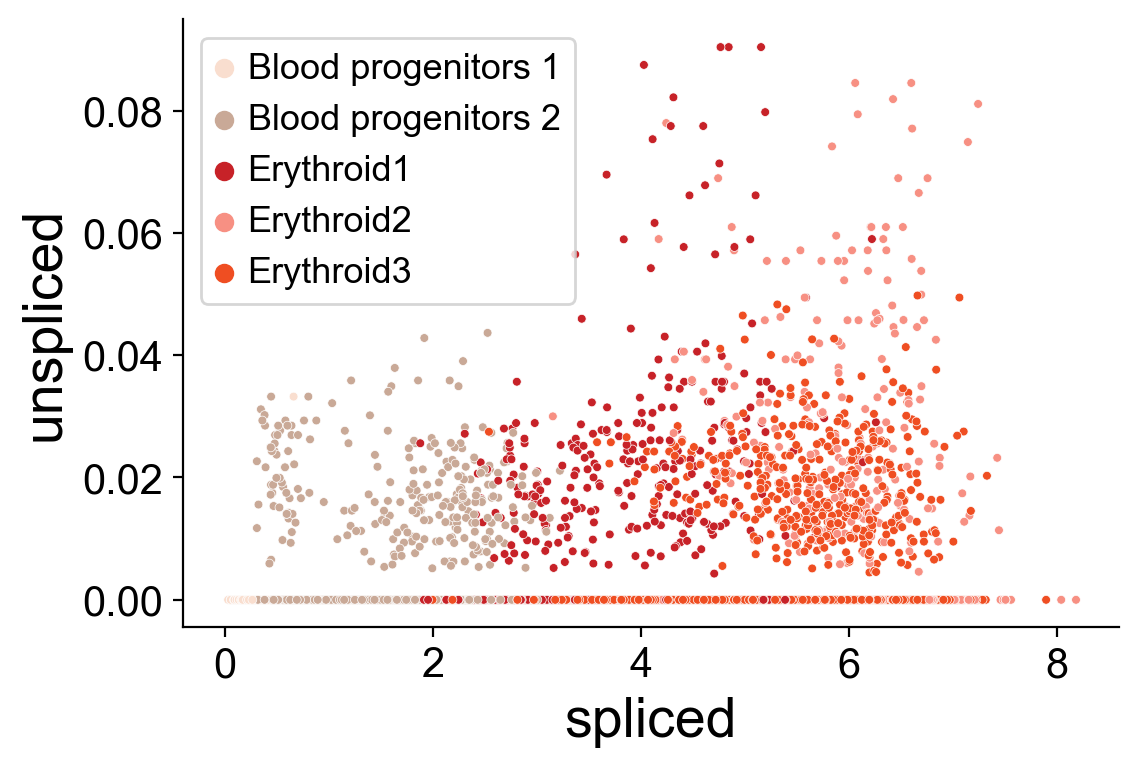

In [41]:
def get_mean_splicing(u0, s0, alpha_, beta_, gamma_, time_):
    pb = np.exp(-beta_ * time_)
    pg = np.exp(-gamma_ * time_)
    u_ss = alpha_ / beta_
    s_ss = alpha_ / gamma_
    u_t = u0 * pb + u_ss * (1 - pb)
    s_t = s0 * pg + s_ss * (1 - pg) + ((alpha_ - beta_ * u0) / (gamma_ - beta_)) * \
        (pg - pb)
    return u_t, s_t

gene_name = "Chchd10"
gene_ = np.where(adata_ery_scvelo.var_names == gene_name)[0][0]
x = adata_ery_scvelo.layers['Ms'][:, gene_].copy()
y = adata_ery_scvelo.layers['Mu'][:, gene_].copy()
z = adata_ery_scvelo.obs['celltype'].values.copy()
hue_order = ['Blood progenitors 1', "Blood progenitors 2", "Erythroid1", \
             "Erythroid2", "Erythroid3"]
colrs_ = adata_ery_scvelo.uns['celltype_colors'].copy()
col_palette = {}
for count_, clust_ in enumerate(hue_order):
    col_palette[clust_] = colrs_[count_]

alpha_ = adata_ery_scvelo.var['fit_alpha'].values[gene_].copy()
beta_ = adata_ery_scvelo.var['fit_beta'].values[gene_].copy()
gamma_ = adata_ery_scvelo.var['fit_gamma'].values[gene_].copy()
scaling_ = adata_ery_scvelo.var['fit_scaling'].values[gene_].copy()

if np.isnan(scaling_):
    scaling_ = 1.0
plt_ = sns.scatterplot(x=x, y=(y * scaling_), s=10, hue=z, hue_order=hue_order, \
                       palette=col_palette)
# up model
t_switch = adata_ery_scvelo.var['fit_t_'].values[gene_].copy()
time_ = np.linspace(0, t_switch, 10000)
u0 = 0.0
s0 = 0.0
u_up, s_up = get_mean_splicing(u0, s0, alpha_, beta_, gamma_, time_)
plt_ = sns.lineplot(x=st[:, gene_], \
                    y=ut[:, gene_] * scaling_, color="red", sort=False, linewidth=3)
# plt_ = sns.lineplot(x=s_up, \
#                     y=u_up * scaling_, color="red", sort=False, linewidth=3, ax=axs[0])

# down model
tmax = 24
time_ = np.linspace(0, tmax / 24 - t_switch, 10000)
alpha_ = 1e-10
u_dn, s_dn = get_mean_splicing(u_up[-1], s_up[-1], alpha_, beta_, gamma_, time_)
# plt_ = sns.lineplot(x=s_dn, y=u_dn * scaling_, color="red", sort=False, linewidth=3, ax=axs[0])

plt.plot([0, s_up[-1]], [0, s_up[-1] * (gamma_ / beta_) * scaling_], color="black", \
            linestyle="dashed")
plt_.set_xlabel("spliced", fontsize=20)
plt_.set_ylabel("unspliced", fontsize=20)
plt_.set_xticklabels(plt_.get_xticklabels(), fontsize=15)
plt_.set_yticklabels(plt_.get_yticklabels(), fontsize=15)
plt_.legend(fontsize=13)
sns.despine()